# Import Library

In [ ]:
import numpy as np
import pandas as pd
import pickle
import re
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils import shuffle
from wordcloud import WordCloud

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Bidirectional
from sklearn.ensemble import VotingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import os
import warnings
warnings.filterwarnings("ignore")


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Sinestesiaaa/CAPSTONE_B-HSD/refs/heads/main/dataset/dataset.csv')

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"  # symbols
                           u"\U000024C2-\U0001F251"  # pictographs
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001F1F2-\U0001F1F4"  # Enclosed Characters
                           u"\U0001F1E6-\U0001F1FF"  # Regional Indicator Symbols
                           u"\U0001F600-\U0001F636"  # Emoticons
                           u"\U0001F681-\U0001F6C5"  # Transport and Map Symbols
                           u"\U0001F30D-\U0001F567"  # Miscellaneous Symbols and Pictographs
                           u"\U0001F680-\U0001F6C0"  # Transport and Map Symbols
                           u"\U0001F600-\U0001F64F"  # Emoticons
                           u"\U0001F300-\U0001F5FF"  # Symbols & Pictographs
                           u"\U0001F680-\U0001F6FF"  # Transport & Map Symbols
                           u"\U0001F1E0-\U0001F1FF"  # Flags (iOS)
                           "]+", flags=re.UNICODE)

    return emoji_pattern.sub(r'', text)

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = remove_emoji(text)
    text = re.sub(r'\d+', '', text)
    return text

df['text'] = df['text'].apply(preprocess_text)

df.to_csv('datasetclear.csv', index=False)

In [ ]:
df = pd.read_csv('datasetclear.csv')
X = df['text']
y = df['label']

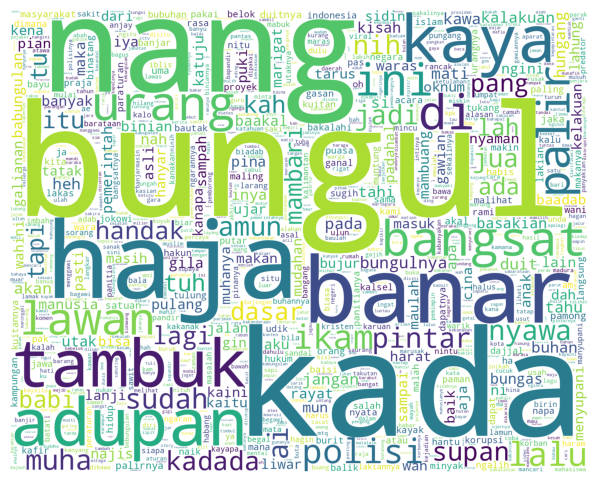

In [ ]:
filtered_text = [text for text, label in zip(X, y) if label == 1]

tfidf = TfidfVectorizer()
tfidf_train = tfidf.fit_transform(filtered_text)
tfidf_weights = [(word, tfidf_train.getcol(idx).sum()) for word, idx in tfidf.vocabulary_.items()]

w = WordCloud(width=1500, height=1200, mode='RGBA', background_color='white', max_words=1000).fit_words(dict(tfidf_weights))

plt.figure(figsize=(9,6))
plt.imshow(w)
plt.axis('off')
plt.show()

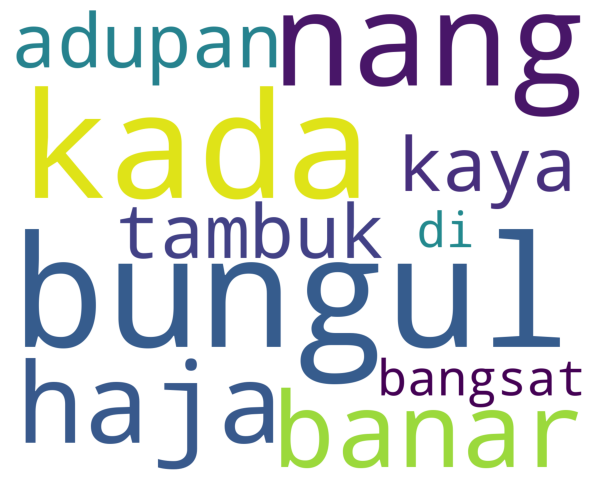

In [ ]:
filtered_text = [text for text, label in zip(X, y) if label == 1]

tfidf = TfidfVectorizer()
tfidf_train = tfidf.fit_transform(filtered_text)
tfidf_weights = [(word, tfidf_train.getcol(idx).sum()) for word, idx in tfidf.vocabulary_.items()]

tfidf_weights.sort(key=lambda x: x[1], reverse=True)

top_words = tfidf_weights[:10]

top_words_dict = dict(top_words)
w = WordCloud(width=1500, height=1200, mode='RGBA', background_color='white', max_words=1000).fit_words(top_words_dict)

plt.figure(figsize=(9,6))
plt.imshow(w)
plt.axis('off')
plt.show()


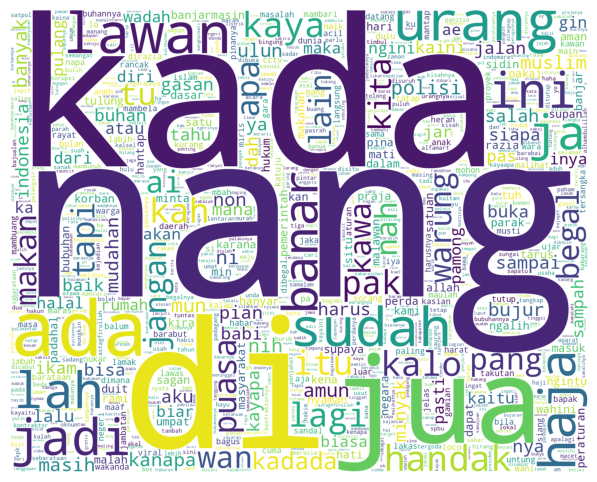

In [ ]:
filtered_text = [text for text, label in zip(X, y) if label == 0]

tfidf = TfidfVectorizer()
tfidf_train = tfidf.fit_transform(filtered_text)
tfidf_weights = [(word, tfidf_train.getcol(idx).sum()) for word, idx in tfidf.vocabulary_.items()]

w = WordCloud(width=1500, height=1200, mode='RGBA', background_color='white', max_words=1000).fit_words(dict(tfidf_weights))

plt.figure(figsize=(9,6))
plt.imshow(w)
plt.axis('off')
plt.show()

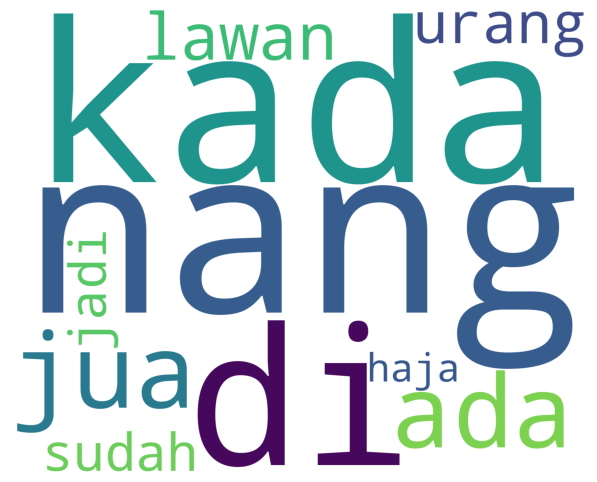

In [ ]:
filtered_text = [text for text, label in zip(X, y) if label == 0]

tfidf = TfidfVectorizer()
tfidf_train = tfidf.fit_transform(filtered_text)
tfidf_weights = [(word, tfidf_train.getcol(idx).sum()) for word, idx in tfidf.vocabulary_.items()]

tfidf_weights.sort(key=lambda x: x[1], reverse=True)

top_words = tfidf_weights[:10]

top_words_dict = dict(top_words)
w = WordCloud(width=1500, height=1200, mode='RGBA', background_color='white', max_words=1000).fit_words(top_words_dict)

plt.figure(figsize=(9,6))
plt.imshow(w)
plt.axis('off')
plt.show()


In [ ]:
vocab_size = 10000
max_length = 100
embedding_dim = 100
oov_token = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

embedding_model = Sequential()
embedding_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))

embedding_vectors = embedding_model.predict(padded_sequences)

X_features = np.mean(embedding_vectors, axis=1)


152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [ ]:
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)

In [ ]:
model_lstm = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.summary()

model_lstm.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.5917 - loss: 0.6531 - val_accuracy: 0.7532 - val_loss: 0.4998
Epoch 2/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.8892 - loss: 0.2747 - val_accuracy: 0.8021 - val_loss: 0.4322
Epoch 3/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 20s 126ms/step - accuracy: 0.9673 - loss: 0.1054 - val_accuracy: 0.8123 - val_loss: 0.5280
Epoch 4/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 20s 121ms/step - accuracy: 0.9850 - loss: 0.0532 - val_accuracy: 0.8175 - val_loss: 0.6584
Epoch 5/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 20s 121ms/step - accuracy: 0.9922 - loss: 0.0250 - val_accuracy: 0.8226 - val_loss: 0.7408


In [ ]:
model_cnn = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn.summary()
model_cnn.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.5817 - loss: 0.6747 - val_accuracy: 0.7609 - val_loss: 0.5152
Epoch 2/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.8544 - loss: 0.3898 - val_accuracy: 0.8252 - val_loss: 0.4018
Epoch 3/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.9468 - loss: 0.1591 - val_accuracy: 0.8329 - val_loss: 0.4247
Epoch 4/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9829 - loss: 0.0848 - val_accuracy: 0.8175 - val_loss: 0.5046
Epoch 5/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9904 - loss: 0.0481 - val_accuracy: 0.8123 - val_loss: 0.5740


In [ ]:
model_bilstm = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Bidirectional(LSTM(64)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_bilstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_bilstm.summary()
model_bilstm.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 19s 124ms/step - accuracy: 0.5567 - loss: 0.6716 - val_accuracy: 0.7481 - val_loss: 0.4859
Epoch 2/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 13s 116ms/step - accuracy: 0.8535 - loss: 0.3586 - val_accuracy: 0.8046 - val_loss: 0.4258
Epoch 3/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 13s 116ms/step - accuracy: 0.9460 - loss: 0.1661 - val_accuracy: 0.8226 - val_loss: 0.4682
Epoch 4/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 20s 116ms/step - accuracy: 0.9734 - loss: 0.0805 - val_accuracy: 0.8252 - val_loss: 0.5550
Epoch 5/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 21s 119ms/step - accuracy: 0.9886 - loss: 0.0495 - val_accuracy: 0.8201 - val_loss: 0.5634


In [ ]:
model_lstm.save('model_lstm.h5')
model_cnn.save('model_cnn.h5')
model_bilstm.save('model_bilstm.h5')

In [ ]:
model_lstm.export('model_lstm_savedmodel')
model_cnn.export('model_cnn_savedmodel')
model_bilstm.export('model_bilstm_savedmodel')


Saved artifact at 'model_lstm_savedmodel'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 100), dtype=tf.float32, name='keras_tensor_20')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  137064104999248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137064356300752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137064355792080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137064355794576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137064355793616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137064355795728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137064355798224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137064355798032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137064355798800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137064355798608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13706435579956

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pred_lstm_prob = model_lstm.predict(X_test)
pred_cnn_prob = model_cnn.predict(X_test)
pred_bilstm_prob = model_bilstm.predict(X_test)

pred_lstm = (pred_lstm_prob > 0.5).astype(int)
pred_cnn = (pred_cnn_prob > 0.5).astype(int)
pred_bilstm = (pred_bilstm_prob > 0.5).astype(int)

pred_stack = np.concatenate([pred_lstm, pred_cnn, pred_bilstm], axis=1)
pred_hard_vote = np.round(np.mean(pred_stack, axis=1)).astype(int)

pred_soft_vote_prob = (pred_lstm_prob + pred_cnn_prob + pred_bilstm_prob) / 3
pred_soft_vote = (pred_soft_vote_prob > 0.5).astype(int)

def evaluate_model(y_true, y_pred, method_name):
    print(f"\n🔎 Evaluation for {method_name}:")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1 Score :", f1_score(y_true, y_pred))

evaluate_model(y_test, pred_hard_vote, "Hard Voting Ensemble")
evaluate_model(y_test, pred_soft_vote, "Soft Voting Ensemble")


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step

🔎 Evaluation for Hard Voting Ensemble:
Accuracy : 0.8240740740740741
Precision: 0.836864406779661
Recall   : 0.8077709611451943
F1 Score : 0.8220603537981269

🔎 Evaluation for Soft Voting Ensemble:
Accuracy : 0.8281893004115226
Precision: 0.8469827586206896
Recall   : 0.803680981595092
F1 Score : 0.8247639034627492


In [ ]:
df_eval = pd.read_csv('https://raw.githubusercontent.com/Sinestesiaaa/CAPSTONE_B-HSD/refs/heads/main/dataset/dataset_eval.csv')

df_eval['text'] = df_eval['text'].apply(preprocess_text)

X_eval_text = df_eval['text']
y_eval = df_eval['label']

sequences_eval = tokenizer.texts_to_sequences(X_eval_text)
X_eval = pad_sequences(sequences_eval, maxlen=max_length, padding='post', truncating='post')


In [ ]:
pred_lstm_prob = model_lstm.predict(X_eval)
pred_cnn_prob = model_cnn.predict(X_eval)
pred_bilstm_prob = model_bilstm.predict(X_eval)

pred_lstm = (pred_lstm_prob > 0.5).astype(int)
pred_cnn = (pred_cnn_prob > 0.5).astype(int)
pred_bilstm = (pred_bilstm_prob > 0.5).astype(int)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [ ]:
pred_stack = np.concatenate([pred_lstm, pred_cnn, pred_bilstm], axis=1)
pred_hard_vote = np.round(np.mean(pred_stack, axis=1)).astype(int)

pred_soft_vote_prob = (pred_lstm_prob + pred_cnn_prob + pred_bilstm_prob) / 3
pred_soft_vote = (pred_soft_vote_prob > 0.5).astype(int)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(name, y_true, y_pred):
    print(f"\n Evaluation for {name}")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1 Score :", f1_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

evaluate_model("LSTM", y_eval, pred_lstm)
evaluate_model("CNN", y_eval, pred_cnn)
evaluate_model("Bi-LSTM", y_eval, pred_bilstm)
evaluate_model("Hard Voting", y_eval, pred_hard_vote)
evaluate_model("Soft Voting", y_eval, pred_soft_vote)



 Evaluation for LSTM
Accuracy : 0.8
Precision: 0.8
Recall   : 0.8
F1 Score : 0.8
Confusion Matrix:
 [[40 10]
 [10 40]]

 Evaluation for CNN
Accuracy : 0.88
Precision: 0.88
Recall   : 0.88
F1 Score : 0.88
Confusion Matrix:
 [[44  6]
 [ 6 44]]

 Evaluation for Bi-LSTM
Accuracy : 0.79
Precision: 0.7636363636363637
Recall   : 0.84
F1 Score : 0.8
Confusion Matrix:
 [[37 13]
 [ 8 42]]

 Evaluation for Hard Voting
Accuracy : 0.83
Precision: 0.8113207547169812
Recall   : 0.86
F1 Score : 0.8349514563106796
Confusion Matrix:
 [[40 10]
 [ 7 43]]

 Evaluation for Soft Voting
Accuracy : 0.86
Precision: 0.8333333333333334
Recall   : 0.9
F1 Score : 0.8653846153846154
Confusion Matrix:
 [[41  9]
 [ 5 45]]
